In [ ]:
!gdown  https://drive.google.com/uc?id=1mXyQ9cSb1DZrxncvow-feN-z2MOC8WMe -O df_merged.csv
!gdown  https://drive.google.com/uc?id=15wgA-G8-b_WyMwb12z7UjxXKQoF54ELw -O olist_order_reviews_dataset.csv
!gdown  https://drive.google.com/uc?id=126vzsrw-4ZU5lKDjeO5YX-mtzANXVyt_ -O brazil_geo.json
!gdown  https://drive.google.com/uc?id=1-3vValZ-9FwCBSlnakE1otnw0TRnXO75 -O olist_df.csv
!gdown  https://drive.google.com/uc?id=1-3vValZ-9FwCBSlnakE1otnw0TRnXO75 -O olist_delivery_df.csv

Downloading...
From: https://drive.google.com/uc?id=1mXyQ9cSb1DZrxncvow-feN-z2MOC8WMe
To: c:\Users\kd010\OneDrive\Documents\DS_study\머신러닝과제폴더\df_merged.csv

  0%|          | 0.00/48.9M [00:00<?, ?B/s]
  1%|          | 524k/48.9M [00:00<00:14, 3.36MB/s]
  6%|▋         | 3.15M/48.9M [00:00<00:03, 14.0MB/s]
 13%|█▎        | 6.29M/48.9M [00:00<00:02, 20.5MB/s]
 20%|██        | 9.96M/48.9M [00:00<00:01, 26.1MB/s]
 27%|██▋       | 13.1M/48.9M [00:00<00:01, 27.5MB/s]
 34%|███▍      | 16.8M/48.9M [00:00<00:01, 29.4MB/s]
 42%|████▏     | 20.4M/48.9M [00:00<00:00, 30.2MB/s]
 49%|████▉     | 24.1M/48.9M [00:00<00:00, 30.9MB/s]
 57%|█████▋    | 27.8M/48.9M [00:01<00:00, 31.6MB/s]
 64%|██████▍   | 31.5M/48.9M [00:01<00:00, 32.1MB/s]
 72%|███████▏  | 35.1M/48.9M [00:01<00:00, 32.3MB/s]
 79%|███████▉  | 38.8M/48.9M [00:01<00:00, 31.8MB/s]
 87%|████████▋ | 42.5M/48.9M [00:01<00:00, 32.2MB/s]
 94%|█████████▍| 46.1M/48.9M [00:01<00:00, 32.3MB/s]
100%|██████████| 48.9M/48.9M [00:01<00:00, 29.2MB/s]
Downl

In [ ]:
from descartes import PolygonPatch
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import networkx as nx
import osmnx as ox
import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
edge_1 = gpd.read_file('brazil_PA_MT_graph.gpkg', layer = 'edges')
node_1 = gpd.read_file('brazil_PA_MT_graph.gpkg', layer = 'nodes')
edge_2 = gpd.read_file('Olist_road_Networdks_Updated_0320.gpkg', layer = 'edges')
node_2 = gpd.read_file('Olist_road_Networdks_Updated_0320.gpkg', layer = 'nodes')
edge_3 = gpd.read_file('BR_added_networks.gpkg', layer = 'edges')
node_3 = gpd.read_file('BR_added_networks.gpkg', layer = 'nodes')
edge_4 = gpd.read_file('brazil_road_networks.gpkg', layer = 'edges')
node_4 = gpd.read_file('brazil_road_networks.gpkg', layer = 'nodes')
edges = pd.concat([edge_1, edge_2, edge_3, edge_4], axis=0)
edges.drop_duplicates(keep='first',inplace=True, ignore_index=True)
nodes = pd.concat([node_1,node_2,node_3,node_4], axis=0)
nodes.drop_duplicates(keep='first',inplace=True, ignore_index=True)

In [ ]:
import geobr as gb

In [ ]:
edges

,u,v,key,osmid,oneway,lanes,ref,name,highway,reversed,length,from,to,bridge,junction,maxspeed,access,width,tunnel,geometry,service,area
0,353252328,8302425282,0,893295473,False,2,MT-100,Rodovia Coronel Ondino Rodrigues Lima,primary,True,42.091,8302425282,353252328,,,,,,,"LINESTRING (-53.33052 -17.72912, -53.33045 -17...",NaN,NaN
1,353252328,8302425275,0,893295473,False,2,MT-100,Rodovia Coronel Ondino Rodrigues Lima,primary,False,9.862,8302425275,353252328,,,,,,,"LINESTRING (-53.33042 -17.72958, -53.33045 -17...",NaN,NaN
2,353252328,8302425284,0,893288551,True,,,,primary_link,False,50.944,8302425284,353252328,,,,,,,"LINESTRING (-53.33071 -17.72913, -53.33069 -17...",NaN,NaN
3,353264292,1888673366,0,178554134,False,2,MT-465,,tertiary,True,37647.797,1888673366,353264292,,,,,,,"LINESTRING (-53.33102 -17.72938, -53.33247 -17...",NaN,NaN
4,1844897557,8370496101,0,179077035,False,2,MT-100,Rodovia Coronel Ondino Rodrigues Lima,primary,True,24819.342,8370496101,1844897557,,,,,,,"LINESTRING (-53.23846 -17.38059, -53.24341 -17...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495624,8140262412,8140325518,0,874452074,True,,,,primary_link,False,29.459,8140325518,8140262412,,,,,,,"LINESTRING (-49.92866 -12.54022, -49.92865 -12...",,
495625,2559518189,2651930722,0,904768811,False,2,TO-080,,primary,False,47.404,2651930722,2559518189,,,,,,,"LINESTRING (-49.95168 -9.28218, -49.95182 -9.2...",,
495626,2559518189,2651930754,0,259738438,True,,,,primary_link,False,55.157,2559518189,2651930754,,,,,,,"LINESTRING (-49.95182 -9.28177, -49.95186 -9.2...",,
495627,2559518189,3628001754,0,"[357569164, 904768813]",False,2,TO-080,TO-080,primary,True,5782.676,3628001754,2559518189,,,,,,,"LINESTRING (-49.96531 -9.23315, -49.96525 -9.2...",,


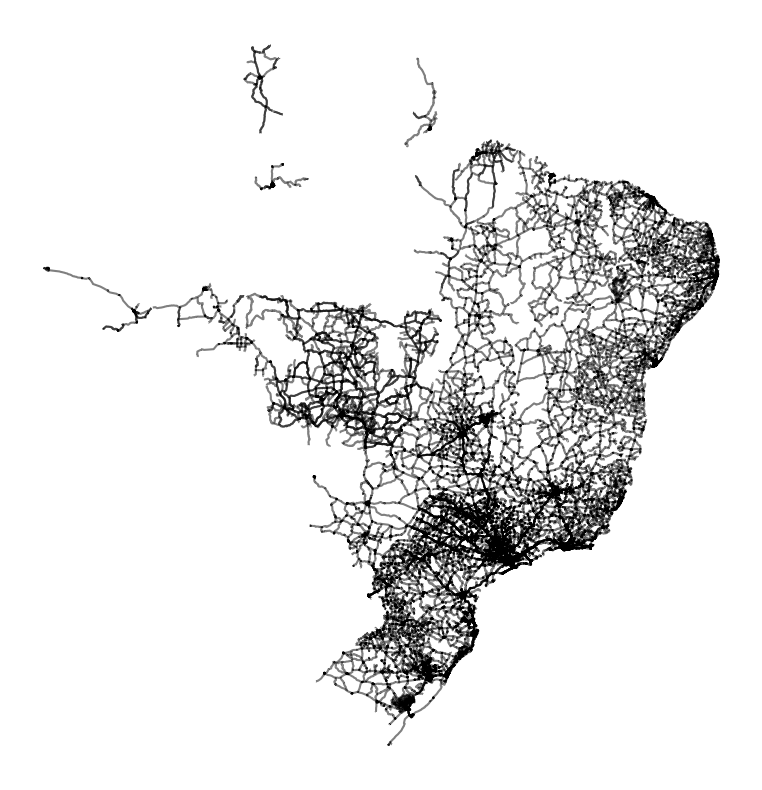

In [ ]:
from shapely import wkt


gdf = gpd.GeoDataFrame(edges, geometry='geometry')

# Plotting
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

ax.set_axis_off()

plt.show()


In [ ]:
df = pd.read_csv('olist_df.csv',encoding='utf-8',index_col=0)
delivery_df = pd.read_csv('olist_delivery_df.csv', encoding='utf-8',index_col=0)

In [ ]:
# 지오메트리 컬럼 생성
geometry_customer = [Point(xy) for xy in zip(df['customer_lng'],df['customer_lat'])]
geometry_seller = [Point(xy) for xy in zip(df['seller_lng'],df['seller_lat'])]
# GeoDataFrame 생성
gdf_customer = gpd.GeoDataFrame(df, geometry=geometry_customer)
gdf_seller = gpd.GeoDataFrame(df, geometry=geometry_seller)
# 좌표계 설정 (예: WGS84)
gpd.crs = "EPSG:4674"



In [ ]:
gdf_customer.rename(columns={'geometry':'geometry_customer'},inplace=True)
gdf_seller.rename(columns={'geometry': 'geometry_seller'},inplace=True)
gdf_customer['geometry_seller'] = gdf_seller['geometry_seller']
gdf_customer

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimate_delivery_time_diff,delivery_time,...,delivery_time_day,delivery_hours,delivery_time_days_IQR,state_same,region_same,customer_region,customer_city_lat,customer_city_lng,geometry_customer,geometry_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,8 days 10:17:58,...,8,202.299444,8,1.0,1.0,남동부,-23.571631,-46.632866,POINT (-46.58718 -23.57682),POINT (-46.44432 -23.68070)
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5 days 08:32:15,12 days 12:03:18,...,12,300.055000,12,0.0,0.0,북동부,-12.146149,-44.980404,POINT (-44.66071 -12.17792),POINT (-43.98043 -19.80768)
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17 days 05:53:31,9 days 09:11:06,...,9,225.185000,9,0.0,0.0,중서부,-16.744773,-48.514109,POINT (-48.51411 -16.74477),POINT (-48.22960 -21.36350)
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12 days 23:31:18,13 days 04:42:43,...,13,316.711944,13,0.0,0.0,북동부,-4.940340,-36.702117,POINT (-35.27336 -5.77413),POINT (-43.92405 -19.83768)
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9 days 05:42:58,2 days 19:56:33,...,2,67.942500,2,1.0,1.0,남동부,-23.640383,-46.509535,POINT (-46.51448 -23.67663),POINT (-46.26209 -23.54339)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98601,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10 days 08:51:59,8 days 05:13:56,...,8,197.232222,8,1.0,1.0,남동부,-23.211925,-45.884883,POINT (-45.88370 -23.17808),POINT (-46.52393 -22.96170)
98602,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1 days 06:22:04,22 days 04:27:19,...,22,532.455278,22,1.0,1.0,남동부,-24.074833,-46.486354,POINT (-46.44986 -24.00150),POINT (-50.49822 -21.93070)
98603,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5 days 12:35:43,24 days 20:20:01,...,24,596.333611,24,0.0,0.0,북동부,-17.897942,-39.373653,POINT (-39.37365 -17.89794),POINT (-46.45200 -23.55322)
98604,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,20 days 00:27:06,17 days 01:56:33,...,17,409.942500,17,0.0,1.0,남동부,-22.563113,-42.692414,POINT (-42.69241 -22.56311),POINT (-45.82732 -20.94085)


In [ ]:
municipalities

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,1100015.0,Alta Floresta D'oeste,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.96836 -12.13407, -61.96827..."
1,1100023.0,Ariquemes,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.18281 -10.13892, -63.18615..."
2,1100031.0,Cabixi,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.70518 -13.32474, -60.70904..."
3,1100049.0,Cacoal,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.34740 -11.50562, -61.34569..."
4,1100056.0,Cerejeiras,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.82417 -13.11156, -60.82289..."
...,...,...,...,...,...,...,...,...
5567,5222005.0,Vianópolis,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-48.30928 -16.84149, -48.30293..."
5568,5222054.0,Vicentinópolis,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-49.73218 -17.74154, -49.73386..."
5569,5222203.0,Vila Boa,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-47.07533 -15.06258, -47.07448..."
5570,5222302.0,Vila Propício,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-48.58701 -15.31582, -48.58952..."


In [ ]:
# 'geometry_customer' 컬럼을 활성 지오메트리로 설정
# 'gdf_customer'의 현재 CRS가 없다면, 'EPSG:4674' (또는 적절한 CRS)로 설정

gdf_customer = gdf_customer.set_geometry('geometry_customer')
gdf_seller = gdf_seller.set_geometry('geometry_seller')
gdf_customer = gdf_customer.set_crs(epsg=4674,allow_override=True)
gdf_seller = gdf_seller.set_crs(epsg=4674,allow_override=True)

# 이제 공간 조인을 수행할 수 있습니다.
# 주의: 여기서 'municipalities'는 공간 조인을 수행할 다른 GeoDataFrame입니다.
# 'municipalities' GeoDataFrame도 유효한 지오메트리 컬럼과 CRS(좌표 참조 시스템)을 가지고 있는지 확인하세요.
municipalities = municipalities.set_geometry('geometry')

customer_geo_df = gpd.sjoin(gdf_customer, municipalities, how="left", predicate="within")
seller_geo_df = gpd.sjoin(gdf_seller, municipalities, how = 'left', predicate='within')


### 브라질 지리데이터에 속하지 않는 이상치들 제거하기

### 브라질 지도에 속하지 않는 데이터 삭제하기

In [ ]:
municipalities = gb.read_municipality(code_muni='all',year=2022)
customer_geo_df = customer_geo_df[['code_muni','name_muni','code_state','abbrev_state','name_state','code_region','name_region']]
seller_geo_df = seller_geo_df[['code_muni','name_muni','code_state','abbrev_state','name_state','code_region','name_region']]

customer_cols = ['customer_' + col for col in customer_geo_df.columns.tolist()]
df[customer_cols] = customer_geo_df[customer_geo_df.columns.tolist()]
seller_cols = ['seller_' + col for col in seller_geo_df.columns.tolist()]
df[seller_cols] = seller_geo_df[seller_geo_df.columns.tolist()]

df.dropna(subset=['customer_name_state'],axis=0,inplace=True)
df.dropna(subset=['seller_name_state'],axis=0,inplace=True)
df = df.reset_index(drop=True)